## **Step 1** : Importing Basic Scikit Learn Libraries for Data Manipulation as well Data Visualization 

In [29]:
# Import Data Manipulation Libraries
import pandas as pd
import numpy as np

# import Data visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Filter Warning Libraries
import warnings
warnings.filterwarnings('ignore')

# Import Data Logging Libraries
import logging
logging.basicConfig(level=logging.INFO,
                    filename='Model.log',
                    filemode= 'w',
                    format='%(asctime)s - %(levelname)s - %(message)s')

## **Step 2** : Data Uploading using Pandas Function

In [30]:
# Load the dataset
url = "https://raw.githubusercontent.com/anirudhajohare19/CementCompositeStrength_PredictionModel/refs/heads/main/concrete_data.csv"

df = pd.read_csv(url)

df.sample(frac=1)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
97,375.0,93.8,0.0,126.6,23.4,852.1,992.6,7,45.70
301,290.4,0.0,96.2,168.1,9.4,961.2,865.0,28,34.74
1024,166.0,259.7,0.0,183.2,12.7,858.8,826.8,28,37.92
1010,317.9,0.0,126.5,209.7,5.7,860.5,736.6,28,40.06
40,342.0,38.0,0.0,228.0,0.0,932.0,670.0,90,50.46
...,...,...,...,...,...,...,...,...,...
280,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,14,24.43
947,299.8,0.0,119.8,211.5,9.9,878.2,727.6,28,23.84
328,252.3,0.0,98.8,146.3,14.2,987.8,889.0,100,60.95
348,213.7,0.0,174.7,154.8,10.2,1053.5,776.4,100,50.08


## **Step 3** : Doing Exploratory Data Analysis [EDA] --->

 1. Univariate Analysis

 2. Bi Variate Analysis


In [ ]:
from collections import OrderedDict

stats = []

for i in df.columns:
    numerical_stats = OrderedDict ({
        'feature': i,
        'unique_values': df[i].nunique(),
        'Missing_values': df[i].isnull().sum(),
        'Min': df[i].min(),
        '25%': df[i].quantile(0.25),
        'Median': df[i].median(),
        'Max': df[i].max(), 
        'Mean': df[i].mean(),
        'mode' : df[i].mode()[0],
        'Standard Deviation': df[i].std(),
        'Variance': df[i].var(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurtosis(),
        'IQR': df[i].quantile(0.75) - df[i].quantile(0.25),
8
        })
    
    stats.append(numerical_stats)

df_stats = pd.DataFrame(stats)

df_stats.style.background_gradient(subset=['unique_values', 'Missing_values', 'Min', '25%', 'Median', 'Max', 'Mean', 'mode', 'Standard Deviation', 'Variance', 'Skewness','Kurtosis','IQR'], cmap='coolwarm')


,feature,unique_values,Missing_values,Min,25%,Median,Max,Mean,mode,Standard Deviation,Variance,Skewness,Kurtosis,IQR
0,cement,278,0,102.000000,192.375000,272.900000,540.000000,281.167864,362.600000,104.506364,10921.580220,0.509481,-0.520652,157.625000
1,blast_furnace_slag,185,0,0.000000,0.000000,22.000000,359.400000,73.895825,0.000000,86.279342,7444.124812,0.800717,-0.508175,142.950000
2,fly_ash,156,0,0.000000,0.000000,0.000000,200.100000,54.188350,0.000000,63.997004,4095.616541,0.537354,-1.328746,118.300000
3,water,195,0,121.800000,164.900000,185.000000,247.000000,181.567282,192.000000,21.354219,456.002651,0.074628,0.122082,27.100000
4,superplasticizer,111,0,0.000000,0.000000,6.400000,32.200000,6.204660,0.000000,5.973841,35.686781,0.907203,1.411269,10.200000
5,coarse_aggregate,284,0,801.000000,932.000000,968.000000,1145.000000,972.918932,932.000000,77.753954,6045.677357,-0.040220,-0.599016,97.400000
6,fine_aggregate,302,0,594.000000,730.950000,779.500000,992.600000,773.580485,594.000000,80.175980,6428.187792,-0.253010,-0.102177,93.050000
7,age,14,0,1.000000,7.000000,28.000000,365.000000,45.662136,28.000000,63.169912,3990.437729,3.269177,12.168989,49.000000
8,concrete_compressive_strength,845,0,2.330000,23.710000,34.445000,82.600000,35.817961,33.400000,16.705742,279.081814,0.416977,-0.313725,22.425000


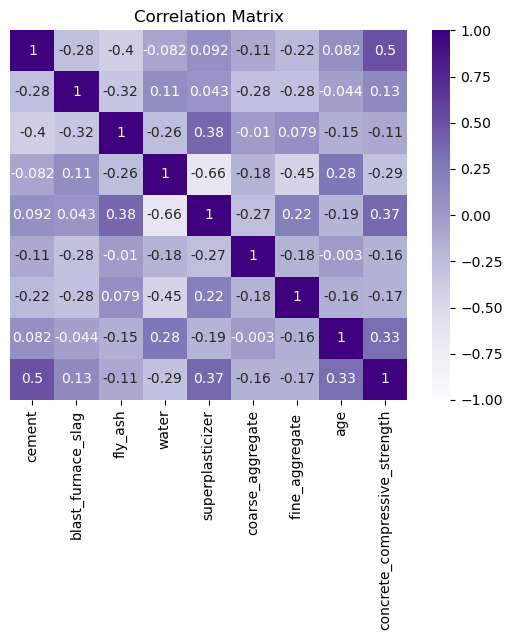

In [53]:
# Chicking Correlation Matrix
# X = Independent Variables
# Y = Dependent Variables -----> ['concrete_compressive_strength']

sns.heatmap(df.corr(), annot = True,yticklabels=False, center = 0,vmax = 1, vmin = -1 ,cmap= 'Purples')
plt.title('Correlation Matrix')
plt.show()